In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [3]:
# read in the data
audio_features_data = pd.read_csv('data/audio_features.csv')
audio_features_data.drop(columns=['Unnamed: 0'], inplace= True)

In [4]:
# some additional cleaning

# for key
key_map = {
    'C': 0,
    'C#': 1,
    'D': 2,
    'D#': 3,
    'E': 4,
    'F': 5,
    'F#': 6,
    'G': 7,
    'G#': 8,
    'A': 9,
    'A#': 10,
    'B': 11
}

mode_map = {
    'Major': 1,
    'major': 1,
    'Minor': 0,
    'minor': 0,
}

# replace the values
audio_features_data['key'] = audio_features_data['key'].replace(key_map)
audio_features_data['mode'] = audio_features_data['mode'].replace(mode_map)

# update the type to be float
audio_features_data['key'] = audio_features_data['key'].astype(float)
audio_features_data['mode'] = audio_features_data['mode'].astype(float)

In [5]:
# note that some songs STAY on the charts for YEARS
audio_features_data[audio_features_data.duplicated(['name', 'artists'])]

,name,artists,year,spotify_genre,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
106,Just The Way You Are,Bruno Mars,2011,['pop'],220733.0,0.637,0.843,5.0,-5.413,1.0,0.0432,0.01510,0.000000,0.0876,0.434,109.012
123,If I Die Young,The Band Perry,2011,"['contemporary country', 'country', 'country d...",222773.0,0.606,0.497,4.0,-6.611,1.0,0.0277,0.34800,0.000000,0.2750,0.362,130.739
128,Only Girl (In The World),Rihanna,2011,"['barbadian pop', 'dance pop', 'pop', 'post-te...",235493.0,0.789,0.716,11.0,-4.241,0.0,0.0434,0.13000,0.000011,0.0690,0.609,125.910
132,Dynamite,Taio Cruz,2011,"['dance pop', 'edm', 'pop', 'pop rap', 'post-t...",203867.0,0.754,0.804,4.0,-3.177,1.0,0.0853,0.00332,0.000000,0.0329,0.818,119.968
140,Just A Dream,Nelly,2011,"['dance pop', 'hip hop', 'pop', 'pop rap', 'ra...",237800.0,0.531,0.752,1.0,-6.161,1.0,0.0305,0.04210,0.000000,0.1200,0.103,89.917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,All I Want For Christmas Is You,Mariah Carey,2023,"['dance pop', 'pop', 'r&b', 'urban contemporary']",242347.0,0.524,0.886,9.0,-4.549,0.0,0.0751,0.08190,0.000000,0.1270,0.506,150.039
1121,Rockin' Around The Christmas Tree,Brenda Lee,2023,"['adult standards', 'brill building pop']",123453.0,0.631,0.569,5.0,-5.956,0.0,0.0438,0.72800,0.000000,0.2700,0.874,71.078
1122,Jingle Bell Rock,Bobby Helms,2023,['adult standards'],130973.0,0.754,0.424,2.0,-8.463,1.0,0.0363,0.64300,0.000000,0.0652,0.806,119.705
1123,A Holly Jolly Christmas,Burl Ives,2023,"['adult standards', 'american folk revival']",135533.0,0.683,0.375,0.0,-13.056,1.0,0.0303,0.57900,0.000000,0.0760,0.888,140.467


In [6]:
multi_year_songs = audio_features_data[audio_features_data.duplicated(['name', 'artists'],keep=False)].groupby(['name', 'artists']).size().reset_index(name='count')
multi_year_songs

,name,artists,count
0,679,"['Fetty Wap', 'Remy Boyz']",2
1,A Holly Jolly Christmas,Burl Ives,2
2,Adorn,Miguel,2
3,All About That Bass,Meghan Trainor,2
4,All I Want For Christmas Is You,Mariah Carey,4
...,...,...,...
110,Without You,"['David Guetta', 'Usher']",2
111,Wrecking Ball,Miley Cyrus,2
112,You Proof,Morgan Wallen,2
113,Young Dumb & Broke,Khalid,2


In [7]:
multi_year_songs[multi_year_songs['count']>2]

,name,artists,count
4,All I Want For Christmas Is You,Mariah Carey,4
73,Rockin' Around The Christmas Tree,Brenda Lee,3


## Exploratory Data Analysis

In [8]:
# printing out the columns for reference
audio_features_data.columns

Index(['name', 'artists', 'year', 'spotify_genre', 'duration_ms',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

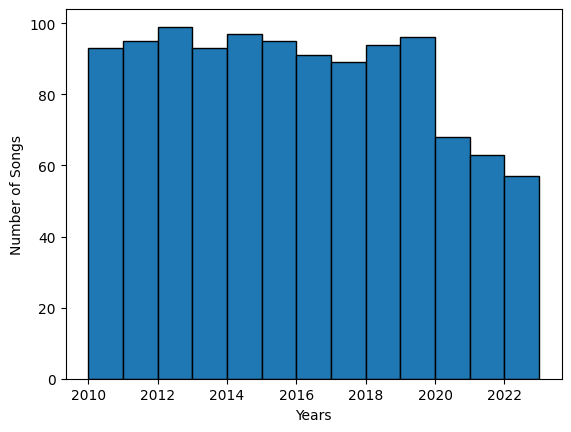

In [10]:
# histogram representation for every year
plt.hist(audio_features_data['year'], bins=range(min(audio_features_data['year']), max(audio_features_data['year']) + 1), edgecolor='black')
plt.xlabel("Years")
plt.ylabel("Number of Songs")
plt.savefig("fig/hist.png", bbox_inches = 'tight')

In [11]:
# breakdown the average of certain audio feature over every year
# key and minor are categorical
audio_features_year = audio_features_data[['danceability', 'energy',
       'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'year', 'duration_ms']]

audio_features_agg = audio_features_year.groupby(['year']).agg(['min', 'max', 'mean', 'var'])
audio_features_agg

danceability                             energy                   \
              min    max      mean       var     min    max      mean   
year                                                                    
2010        0.209  0.879  0.623247  0.019443  0.3000  0.954  0.751204   
2011        0.349  0.845  0.627242  0.012646  0.3190  0.946  0.752000   
2012        0.378  0.929  0.650980  0.011406  0.3030  0.972  0.737697   
2013        0.388  0.936  0.635785  0.012753  0.2800  0.948  0.710699   
2014        0.279  0.964  0.650041  0.018546  0.1460  0.963  0.687175   
2015        0.213  0.893  0.663926  0.021563  0.0743  0.961  0.653014   
2016        0.355  0.934  0.660495  0.016149  0.0565  0.928  0.626027   
2017        0.400  0.941  0.715753  0.015349  0.3140  0.887  0.634618   
2018        0.362  0.964  0.721106  0.017063  0.3080  0.913  0.632819   
2019        0.367  0.950  0.716656  0.017799  0.1110  0.908  0.618312   
2020        0.459  0.929  0.681235  0.013899  0.3200  0.949  0.609118   
2021        0.314  0.914  0.658492  0.021095  0.1170  0.893  0.575127   
2022        0.403  0.951  0.673316  0.017004  0.3660  0.912  0.665395   
2023        0.520  0.951  0.655421  0.014147  0.3750  0.931  0.656053   

               loudness         ...   valence             tempo           \
           var      min    max  ...      mean       var     min      max   
year                            ...                                        
2010  0.017015  -10.231 -1.190  ...  0.557753  0.046993  66.002  189.630   
2011  0.018273  -11.459 -1.921  ...  0.537424  0.046534  74.008  205.570   
2012  0.023922  -10.881 -1.958  ...  0.564091  0.044182  79.907  201.800   
2013  0.026153  -10.164 -2.671  ...  0.525186  0.046589  72.795  185.063   
2014  0.024715  -11.523 -2.392  ...  0.521340  0.057096  76.289  205.958   
2015  0.028958  -18.071 -2.255  ...  0.509611  0.052880  53.863  205.846   
2016  0.024614  -15.099 -2.787  ...  0.449543  0.039694  78.991  190.050   
2017  0.021754  -14.712 -2.512  ...  0.522990  0.040926  72.997  186.005   
2018  0.019919  -10.532 -2.384  ...  0.459015  0.041883  64.934  203.911   
2019  0.020192  -14.505 -2.253  ...  0.478927  0.041300  75.445  202.015   
2020  0.021978  -10.965 -2.607  ...  0.476875  0.038838  75.980  180.051   
2021  0.027412  -19.180 -2.278  ...  0.487411  0.046978  71.078  181.088   
2022  0.025542  -13.123 -2.278  ...  0.566658  0.065525  69.877  196.000   
2023  0.030584  -13.056 -2.565  ...  0.634421  0.036895  71.078  173.930   

                              duration_ms                           \
            mean          var         min       max           mean   
year                                                                 
2010  117.507344   736.553947    177253.0  357346.0  229969.956989   
2011  126.646042   664.634077    167426.0  320626.0  234837.600000   
2012  124.755071   556.177677     78200.0  329320.0  224335.383838   
2013  118.556075   702.414272    157152.0  484147.0  233001.483871   
2014  123.288856   867.924422    169586.0  688453.0  232468.587629   
2015  121.616705   965.931264    142212.0  312026.0  217623.778947   
2016  123.512615   711.123537    152862.0  313546.0  222608.835165   
2017  119.608775   758.662054    139311.0  343150.0  223313.348315   
2018  121.315840   955.925498    121886.0  413680.0  211700.436170   
2019  119.580562   738.247130     96332.0  312820.0  194608.989583   
2020  118.449235   748.672051    114893.0  279906.0  194026.617647   
2021  116.225762   953.889166    123262.0  339023.0  191987.206349   
2022  122.278526  1102.873418    123453.0  329160.0  192825.000000   
2023  121.655632   886.725657    123453.0  265613.0  188804.526316   

                    
               var  
year                
2010  9.379340e+08  
2011  9.523836e+08  
2012  9.189920e+08  
2013  2.295562e+09  
2014  3.221561e+09  
2015  8.336588e+08  
2016  8.115479e+08  
2017  1.448448e+09  
2018  1.846606e+09  
2019  1.132780e+09  
2020  

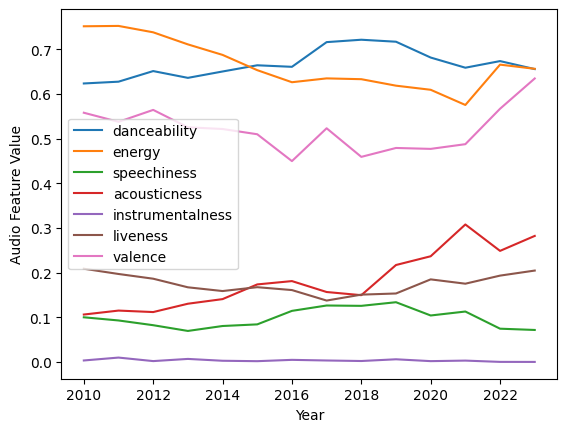

In [12]:
# line plot
audio_features_mean = audio_features_year.groupby(['year']).mean()
line_plot = audio_features_mean.drop(columns=['tempo', 'loudness', 'duration_ms']) # pull out these as they are on different scales
plt.plot(line_plot, label = line_plot.columns)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Audio Feature Value')
plt.savefig("fig/audio_features_avg.png")

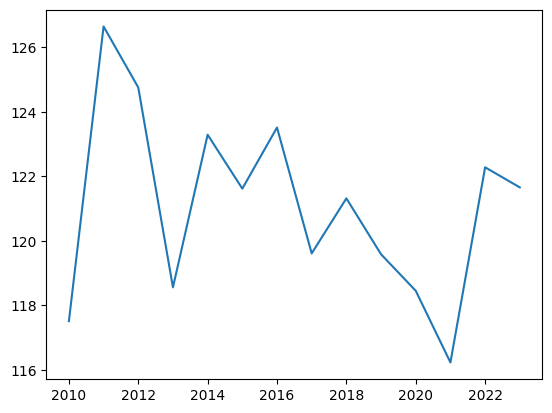

In [16]:
# tempo
plt.plot(audio_features_mean['tempo'])
plt.savefig("fig/tempo_avg.png", bbox_inches = 'tight')

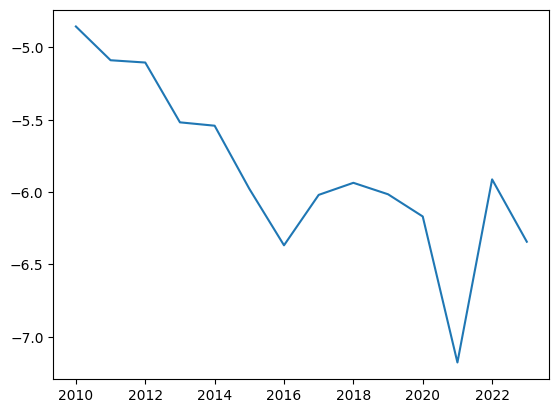

In [15]:
# loudness
plt.plot(audio_features_mean['loudness'])
plt.savefig("fig/loudness_avg.png", bbox_inches = 'tight')

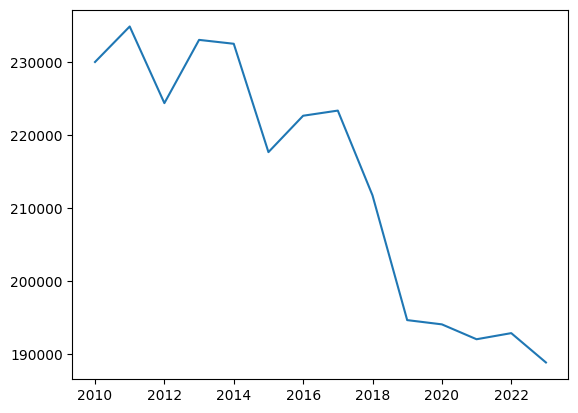

In [14]:
# duration_ms
plt.plot(audio_features_mean['duration_ms'])
plt.savefig("fig/duration_avg.png", bbox_inches = 'tight')

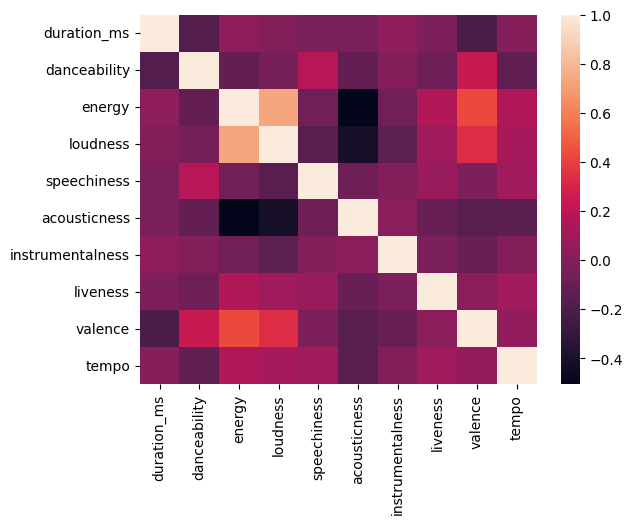

In [17]:
audio_features_corr = audio_features_data[['duration_ms',
       'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
sns.heatmap(audio_features_corr.corr())
plt.savefig("fig/corr_plot.png", bbox_inches = 'tight')

- negative correlation between energy and acoustiness (makes sense)
- positive correlation between energy and loudness (makes sense)
- somewhat negative correlation between danceability and duration?
- somewhat negative correlation between valence and duration?
- somewhat positive correlation between energy and valence (also somewhat makes sense)


## Preprocessing

In [140]:
# set up dataframe for each category with datetime indexes to be used for analysis
audio_features_dti = audio_features_mean[[ 'danceability', 'valence', 'acousticness', 'loudness',
                                          'energy', 'tempo', 'duration_ms']]
audio_features_dti.index = pd.to_datetime(audio_features_dti.index, format= "%Y")
audio_features_dti

,danceability,valence,acousticness,loudness,energy,tempo,duration_ms
year,,,,,,,
2010-01-01,0.623247,0.557753,0.106231,-4.854849,0.751204,117.507344,229969.956989
2011-01-01,0.627242,0.537424,0.115084,-5.088347,0.752000,126.646042,234837.600000
2012-01-01,0.650980,0.564091,0.111772,-5.104182,0.737697,124.755071,224335.383838
2013-01-01,0.635785,0.525186,0.130420,-5.517753,0.710699,118.556075,233001.483871
2014-01-01,0.650041,0.521340,0.140742,-5.541052,0.687175,123.288856,232468.587629
2015-01-01,0.663926,0.509611,0.173621,-5.977274,0.653014,121.616705,217623.778947
2016-01-01,0.660495,0.449543,0.181058,-6.368033,0.626027,123.512615,222608.835165
2017-01-01,0.715753,0.522990,0.156630,-6.019360,0.634618,119.608775,223313.348315
2018-01-01,0.721106,0.459015,0.149550,-5.935883,0.632819,121.315840,211700.436170


In [149]:
# do a scaled version of the dataframe
scaler = StandardScaler()
audio_features_scaled = pd.DataFrame(scaler.fit_transform(audio_features_dti))
audio_features_scaled.index = audio_features_dti.index
audio_features_scaled.columns = audio_features_dti.columns
audio_features_scaled

,danceability,valence,acousticness,loudness,energy,tempo,duration_ms
year,,,,,,,
2010-01-01,-1.410445,0.768416,-1.211034,1.716055,1.614811,-1.263264,0.958939
2011-01-01,-1.280754,0.345658,-1.070757,1.316974,1.629707,1.976073,1.246228
2012-01-01,-0.510113,0.900228,-1.123240,1.289910,1.361942,1.305792,0.626386
2013-01-01,-1.003412,0.091148,-0.827776,0.583058,0.856515,-0.891527,1.137860
2014-01-01,-0.540583,0.011168,-0.664234,0.543237,0.416132,0.786072,1.106408
2015-01-01,-0.089806,-0.232766,-0.143296,-0.202330,-0.223402,0.193356,0.230267
2016-01-01,-0.201219,-1.481957,-0.025471,-0.870194,-0.728608,0.865387,0.524485
2017-01-01,1.592735,0.045476,-0.412500,-0.274261,-0.567786,-0.518383,0.566066
2018-01-01,1.766538,-1.284972,-0.524691,-0.131587,-0.601462,0.086710,-0.119329


## Time Series Decomposition

In [191]:
# write a function to do the decomp after entering the features
# and then plot them

def time_series_decomp_and_plot(feature):
    res = sm.tsa.STL(audio_features_dti[feature], period = 2).fit()
    res.plot()
    plt.savefig(f'fig/decomp_{feature}.png', bbox_inches = 'tight')
    plt.show()

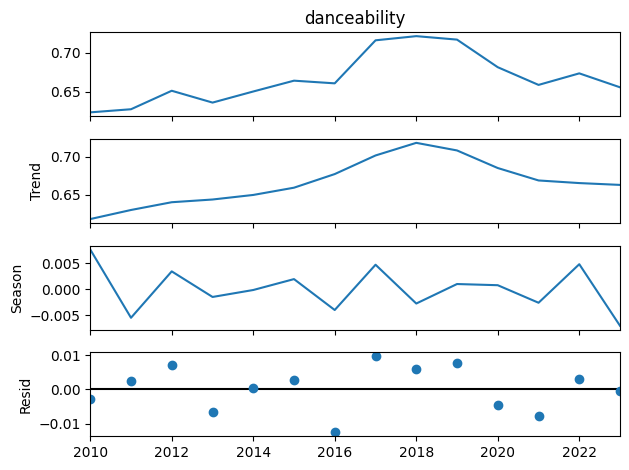

In [192]:
time_series_decomp_and_plot("danceability")

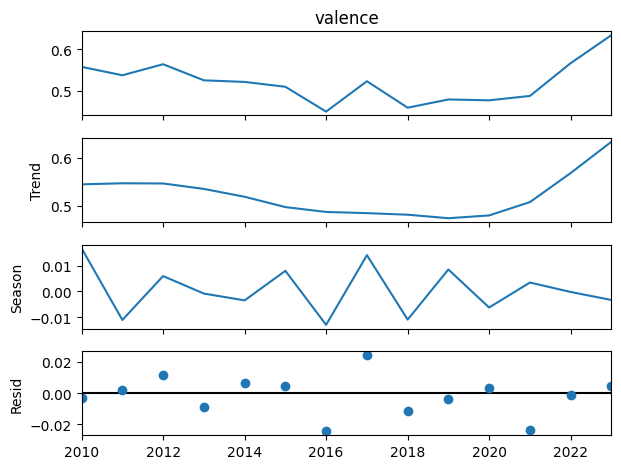

In [193]:
time_series_decomp_and_plot("valence")

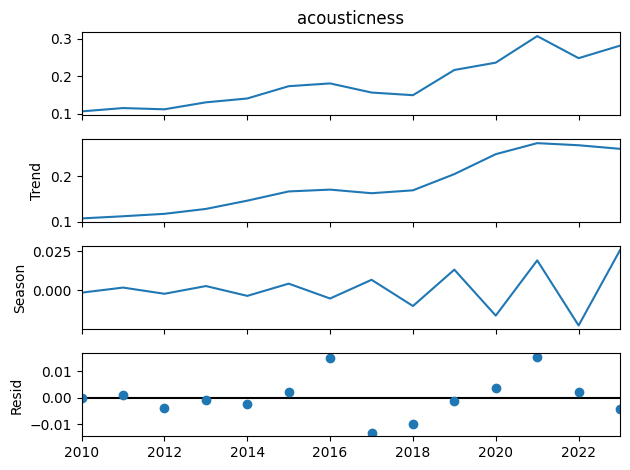

In [195]:
time_series_decomp_and_plot("acousticness")

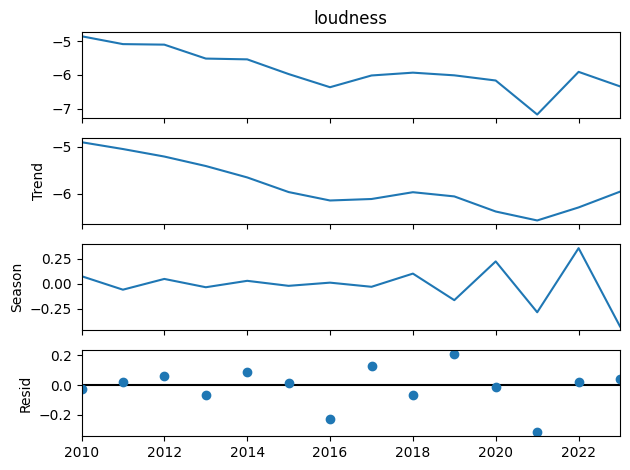

In [196]:
time_series_decomp_and_plot("loudness")

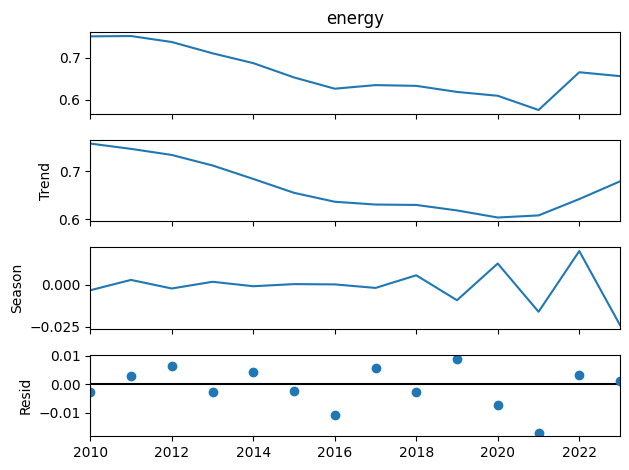

In [197]:
time_series_decomp_and_plot("energy")

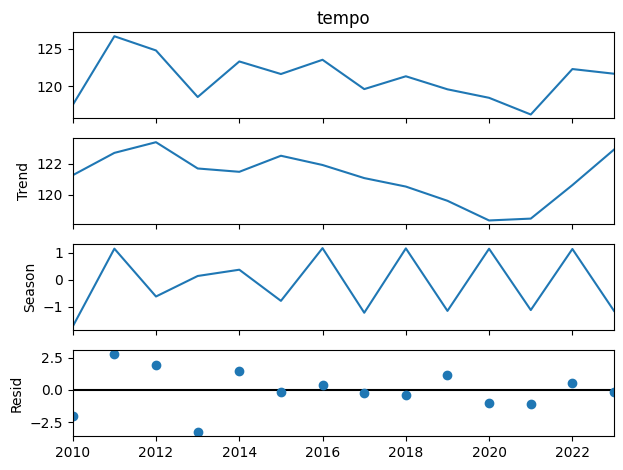

In [198]:
time_series_decomp_and_plot("tempo")

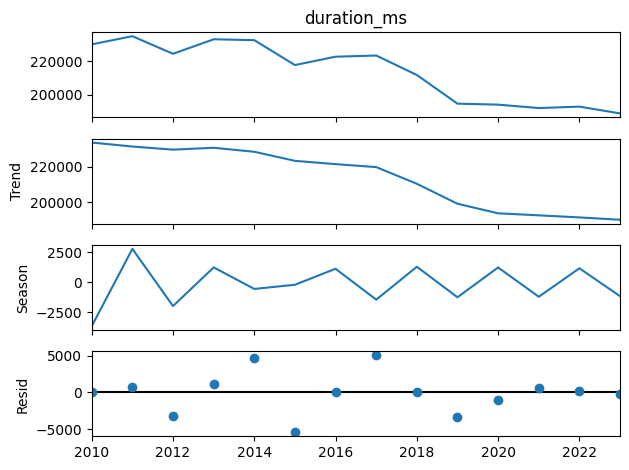

In [189]:
time_series_decomp_and_plot("duration_ms")

## ADF Tests

In [205]:
# VAR has to be stationary, so we need to do differencing if it fails the augment dickey-fuller test
for feature in audio_features_scaled.columns:
    ad_result = sm.tsa.stattools.adfuller(audio_features_scaled[feature])
    print(f'{feature}:', ad_result[1], ad_result[1] < 0.05)

danceability: 0.4335646011373701 False
valence: 0.7254080589202149 False
acousticness: 0.9956061779004717 False
loudness: 0.042120188198692635 True
energy: 8.34715728919663e-05 True
tempo: 0.004476857564023223 True
duration_ms: 0.9095150861061954 False


In [231]:
# need to difference danceability, valence, acousticness, and duration_ms
diff_features =['danceability', 'valence', 'acousticness', 'duration_ms']
audio_features_diff = audio_features_scaled.copy()
audio_features_diff['danceability'] = audio_features_scaled['danceability'].diff()
#audio_features_diff['danceability'] = audio_features_diff['danceability'].ffill()
audio_features_diff['valence'] = audio_features_scaled['valence'].diff()
audio_features_diff['acousticness'] = audio_features_scaled['acousticness'].diff()
audio_features_diff['duration_ms'] = audio_features_scaled['duration_ms'].diff()
audio_features_diff

,danceability,valence,acousticness,loudness,energy,tempo,duration_ms
year,,,,,,,
2010-01-01,NaN,NaN,NaN,1.716055,1.614811,-1.263264,NaN
2011-01-01,0.129690,-0.422759,0.140278,1.316974,1.629707,1.976073,0.287288
2012-01-01,0.770641,0.554571,-0.052483,1.289910,1.361942,1.305792,-0.619841
2013-01-01,-0.493299,-0.809081,0.295464,0.583058,0.856515,-0.891527,0.511473
2014-01-01,0.462829,-0.079979,0.163542,0.543237,0.416132,0.786072,-0.031452
2015-01-01,0.450777,-0.243935,0.520938,-0.202330,-0.223402,0.193356,-0.876141
2016-01-01,-0.111413,-1.249190,0.117825,-0.870194,-0.728608,0.865387,0.294218
2017-01-01,1.793954,1.527432,-0.387029,-0.274261,-0.567786,-0.518383,0.041580
2018-01-01,0.173803,-1.330448,-0.112190,-0.131587,-0.601462,0.086710,-0.685394


In [225]:
# check again in case we need more differencing
for feature in audio_features_diff.columns:
    ad_result = sm.tsa.stattools.adfuller(audio_features_diff[feature].dropna())
    print(f'{feature}:', ad_result[1], ad_result[1] < 0.05)

danceability: 0.030005235386610537 True
valence: 0.9960313429394777 False
acousticness: 0.0022394228512801467 True
loudness: 0.042120188198692635 True
energy: 8.34715728919663e-05 True
tempo: 0.004476857564023223 True
duration_ms: 0.0010734857074007446 True


- dropping valence, because even after third order+ differencing, it is not passing ADF - indicates strong trend

In [232]:
audio_features_diff.drop(columns=['valence'], inplace= True)
audio_features_diff.dropna(inplace= True)
audio_features_diff

,danceability,acousticness,loudness,energy,tempo,duration_ms
year,,,,,,
2011-01-01,0.129690,0.140278,1.316974,1.629707,1.976073,0.287288
2012-01-01,0.770641,-0.052483,1.289910,1.361942,1.305792,-0.619841
2013-01-01,-0.493299,0.295464,0.583058,0.856515,-0.891527,0.511473
2014-01-01,0.462829,0.163542,0.543237,0.416132,0.786072,-0.031452
2015-01-01,0.450777,0.520938,-0.202330,-0.223402,0.193356,-0.876141
2016-01-01,-0.111413,0.117825,-0.870194,-0.728608,0.865387,0.294218
2017-01-01,1.793954,-0.387029,-0.274261,-0.567786,-0.518383,0.041580
2018-01-01,0.173803,-0.112190,-0.131587,-0.601462,0.086710,-0.685394
2019-01-01,-0.144473,1.069275,-0.267094,-0.873039,-0.528383,-1.008738


## VAR & Granger Causality Tests

In [242]:
var_model = sm.tsa.VAR(audio_features_diff[['acousticness','loudness', 'energy']])
lag = var_model.select_order()
lag.summary()

C:\Users\cjyu9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-3.434,-3.325,0.03231,-3.502
1,-5.467,-5.033,0.004691,-5.740
2,-6.917*,-6.157*,0.001984*,-7.395*


In [243]:
result = var_model.fit(2)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Dec, 2024
Time:                     23:37:44
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -6.15700
Nobs:                     11.0000    HQIC:                  -7.39545
Log likelihood:           12.2164    FPE:                 0.00198414
AIC:                     -6.91662    Det(Omega_mle):     0.000452829
--------------------------------------------------------------------
Results for equation acousticness
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.309743         0.176359            1.756           0.079
L1.acousticness        -0.461784         0.416627           -1.108           0.268
L1.loudness             0.851423         0.40

In [247]:
# granger casuality tests
sm.tsa.stattools.grangercausalitytests(audio_features_diff[['loudness', 'energy']], maxlag = 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.6774  , p=0.0217  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=10.2365 , p=0.0014  , df=1
likelihood ratio test: chi2=7.4019  , p=0.0065  , df=1
parameter F test:         F=7.6774  , p=0.0217  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9926  , p=0.2170  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=7.3063  , p=0.0259  , df=2
likelihood ratio test: chi2=5.6028  , p=0.0607  , df=2
parameter F test:         F=1.9926  , p=0.2170  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.4357  , p=0.1263  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=44.3575 , p=0.0000  , df=3
likelihood ratio test: chi2=16.9300 , p=0.0007  , df=3
parameter F test:         F=4.4357  , p=0.1263  , df_denom=3, df_num=3


{1: ({'ssr_ftest': (7.677364694767915, 0.021724867596516765, 9.0, 1),
   'ssr_chi2test': (10.236486259690553, 0.0013768962350270435, 1),
   'lrtest': (7.401933782303452, 0.0065153800323332865, 1),
   'params_ftest': (7.677364694767916, 0.021724867596516765, 9.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.9926173719897744, 0.21695962100432642, 6.0, 2),
   'ssr_chi2test': (7.306263697295839, 0.025909855830947844, 2),
   'lrtest': (5.602828077284066, 0.06072413561321677, 2),
   'params_ftest': (1.9926173719897744, 0.21695962100432642, 6.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (4.4357469436791215, 0.1263002275195437, 3.0, 3),
   'ssr_chi2test': (44.35746943679122, 1.2670701455402595e-09, 3),
   'lrtest': (16.929969432699142, 0.0007305707613103406, 3),
   'params_ftest': (4.435746943679143, 0.126300227519543, 3.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.

In [248]:
sm.tsa.stattools.grangercausalitytests(audio_features_diff[['energy', 'loudness']], maxlag = 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=23.6275 , p=0.0009  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=31.5033 , p=0.0000  , df=1
likelihood ratio test: chi2=15.4552 , p=0.0001  , df=1
parameter F test:         F=23.6275 , p=0.0009  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.9042  , p=0.0208  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=28.9821 , p=0.0000  , df=2
likelihood ratio test: chi2=14.1959 , p=0.0008  , df=2
parameter F test:         F=7.9042  , p=0.0208  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=19.0363 , p=0.0186  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=190.3627, p=0.0000  , df=3
likelihood ratio test: chi2=29.9754 , p=0.0000  , df=3
parameter F test:         F=19.0363 , p=0.0186  , df_denom=3, df_num=3


{1: ({'ssr_ftest': (23.627492930482916, 0.0008948261857074064, 9.0, 1),
   'ssr_chi2test': (31.50332390731056, 1.9909914898868085e-08, 1),
   'lrtest': (15.455168364596727, 8.448558924088861e-05, 1),
   'params_ftest': (23.627492930482912, 0.0008948261857074064, 9.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (7.904222320743349, 0.020824744012874697, 6.0, 2),
   'ssr_chi2test': (28.98214850939228, 5.088694916752916e-07, 2),
   'lrtest': (14.195915738780288, 0.000826791616924255, 2),
   'params_ftest': (7.90422232074334, 0.020824744012874746, 6.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (19.036273676673293, 0.018642820374859034, 3.0, 3),
   'ssr_chi2test': (190.36273676673292, 5.096260944575089e-41, 3),
   'lrtest': (29.975443146491042, 1.3965692739168369e-06, 3),
   'params_ftest': (19.036273676673265, 0.01864282037485907, 3.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
        

In [249]:
sm.tsa.stattools.grangercausalitytests(audio_features_diff[['loudness', 'acousticness']], maxlag = 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4164  , p=0.5349  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=0.5552  , p=0.4562  , df=1
likelihood ratio test: chi2=0.5427  , p=0.4613  , df=1
parameter F test:         F=0.4164  , p=0.5349  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9629  , p=0.2209  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=7.1973  , p=0.0274  , df=2
likelihood ratio test: chi2=5.5372  , p=0.0628  , df=2
parameter F test:         F=1.9629  , p=0.2209  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.1807  , p=0.0844  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=61.8069 , p=0.0000  , df=3
likelihood ratio test: chi2=19.7139 , p=0.0002  , df=3
parameter F test:         F=6.1807  , p=0.0844  , df_denom=3, df_num=3


{1: ({'ssr_ftest': (0.4163709334940808, 0.5348551745333754, 9.0, 1),
   'ssr_chi2test': (0.5551612446587744, 0.45621644731003186, 1),
   'lrtest': (0.5427022296276078, 0.46131498748354915, 1),
   'params_ftest': (0.416370933494081, 0.5348551745333754, 9.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.962909635120209, 0.22087911895231047, 6.0, 2),
   'ssr_chi2test': (7.1973353287741, 0.02736015107797969, 2),
   'lrtest': (5.53717890064237, 0.06275045497987787, 2),
   'params_ftest': (1.962909635120208, 0.22087911895231058, 6.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (6.18068616000809, 0.08444366618531457, 3.0, 3),
   'ssr_chi2test': (61.80686160008091, 2.416197799451752e-13, 3),
   'lrtest': (19.713949439547818, 0.00019455970688838855, 3),
   'params_ftest': (6.180686160008096, 0.08444366618531447, 3.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1

In [250]:
sm.tsa.stattools.grangercausalitytests(audio_features_diff[['acousticness', 'loudness']], maxlag = 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8878  , p=0.3707  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=1.1837  , p=0.2766  , df=1
likelihood ratio test: chi2=1.1289  , p=0.2880  , df=1
parameter F test:         F=0.8878  , p=0.3707  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3417  , p=0.3299  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=4.9194  , p=0.0855  , df=2
likelihood ratio test: chi2=4.0661  , p=0.1309  , df=2
parameter F test:         F=1.3417  , p=0.3299  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.6759  , p=0.1187  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=46.7594 , p=0.0000  , df=3
likelihood ratio test: chi2=17.3624 , p=0.0006  , df=3
parameter F test:         F=4.6759  , p=0.1187  , df_denom=3, df_num=3


{1: ({'ssr_ftest': (0.8877505433574474, 0.37068943252743836, 9.0, 1),
   'ssr_chi2test': (1.1836673911432631, 0.27661065031593063, 1),
   'lrtest': (1.1288651380866739, 0.2880175364643805, 1),
   'params_ftest': (0.887750543357449, 0.3706894325274377, 9.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.3416601010051101, 0.3299106251201616, 6.0, 2),
   'ssr_chi2test': (4.91942037035207, 0.08545971487089614, 2),
   'lrtest': (4.066089478633195, 0.13093624687507946, 2),
   'params_ftest': (1.3416601010051101, 0.3299106251201616, 6.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (4.675935460591438, 0.11868300284570107, 3.0, 3),
   'ssr_chi2test': (46.759354605914375, 3.910355264889132e-10, 3),
   'lrtest': (17.362353886537704, 0.0005952495530440847, 3),
   'params_ftest': (4.675935460591448, 0.11868300284570074, 3.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.

In [251]:
sm.tsa.stattools.grangercausalitytests(audio_features_diff[['acousticness', 'energy']], maxlag = 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0012  , p=0.9727  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=0.0016  , p=0.9676  , df=1
likelihood ratio test: chi2=0.0016  , p=0.9676  , df=1
parameter F test:         F=0.0012  , p=0.9727  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0835  , p=0.9209  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=0.3062  , p=0.8581  , df=2
likelihood ratio test: chi2=0.3020  , p=0.8599  , df=2
parameter F test:         F=0.0835  , p=0.9209  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2134  , p=0.1817  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=32.1338 , p=0.0000  , df=3
likelihood ratio test: chi2=14.3826 , p=0.0024  , df=3
parameter F test:         F=3.2134  , p=0.1817  , df_denom=3, df_num=3


{1: ({'ssr_ftest': (0.001233901062145965, 0.9727452790790547, 9.0, 1),
   'ssr_chi2test': (0.00164520141619462, 0.9676458102476212, 1),
   'lrtest': (0.0016450886478480697, 0.9676469184981437, 1),
   'params_ftest': (0.0012339010621457032, 0.9727452790790768, 9.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.08350048062800208, 0.9209407767875416, 6.0, 2),
   'ssr_chi2test': (0.306168428969341, 0.8580574579019677, 2),
   'lrtest': (0.3019850091743699, 0.8598541435968187, 2),
   'params_ftest': (0.08350048062800206, 0.9209407767875416, 6.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.213376236135618, 0.181661269150201, 3.0, 3),
   'ssr_chi2test': (32.13376236135618, 4.904528943310166e-07, 3),
   'lrtest': (14.38264282625883, 0.0024279814463692142, 3),
   'params_ftest': (3.2133762361356237, 0.1816612691502007, 3.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [252]:
sm.tsa.stattools.grangercausalitytests(audio_features_diff[['energy', 'acousticness']], maxlag = 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6345  , p=0.4462  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=0.8459  , p=0.3577  , df=1
likelihood ratio test: chi2=0.8175  , p=0.3659  , df=1
parameter F test:         F=0.6345  , p=0.4462  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1503  , p=0.8636  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=0.5512  , p=0.7591  , df=2
likelihood ratio test: chi2=0.5378  , p=0.7642  , df=2
parameter F test:         F=0.1503  , p=0.8636  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5492  , p=0.1629  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=35.4923 , p=0.0000  , df=3
likelihood ratio test: chi2=15.1496 , p=0.0017  , df=3
parameter F test:         F=3.5492  , p=0.1629  , df_denom=3, df_num=3


{1: ({'ssr_ftest': (0.6344557305285995, 0.4462273483374988, 9.0, 1),
   'ssr_chi2test': (0.8459409740381326, 0.3577031583902516, 1),
   'lrtest': (0.8174548097599192, 0.36592537207789166, 1),
   'params_ftest': (0.6344557305285988, 0.44622734833749944, 9.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.15031946757523723, 0.8635748250685786, 6.0, 2),
   'ssr_chi2test': (0.5511713811092032, 0.75912737926074, 2),
   'lrtest': (0.5378073503527911, 0.7642168651576623, 2),
   'params_ftest': (0.15031946757523698, 0.863574825068579, 6.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.549227344683162, 0.1629269522229849, 3.0, 3),
   'ssr_chi2test': (35.492273446831625, 9.587698718548143e-08, 3),
   'lrtest': (15.1495740418742, 0.0016931876761463328, 3),
   'params_ftest': (3.5492273446831644, 0.16292695222298478, 3.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.,

In [244]:
var_model = sm.tsa.VAR(audio_features_diff[['danceability', 'duration_ms']])
lag = var_model.select_order()
lag.summary()

C:\Users\cjyu9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-1.846*,-1.786*,0.1581*,-1.912
1,-1.737,-1.556,0.1829,-1.936
2,-1.702,-1.400,0.2220,-2.034
3,-1.611,-1.188,0.3898,-2.076*


In [253]:
result = var_model.fit(2)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Dec, 2024
Time:                     23:52:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.887913
Nobs:                     11.0000    HQIC:                  -1.47765
Log likelihood:          -14.3437    FPE:                   0.330827
AIC:                     -1.24964    Det(Omega_mle):        0.156368
--------------------------------------------------------------------
Results for equation danceability
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.314480         0.333234            0.944           0.345
L1.danceability        -0.051124         0.444927           -0.115           0.909
L1.duration_ms          1.141029         0.53

In [254]:
sm.tsa.stattools.grangercausalitytests(audio_features_diff[['danceability', 'duration_ms']], maxlag = 2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3689  , p=0.0326  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=8.4918  , p=0.0036  , df=1
likelihood ratio test: chi2=6.4214  , p=0.0113  , df=1
parameter F test:         F=6.3689  , p=0.0326  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3035  , p=0.1810  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=8.4461  , p=0.0147  , df=2
likelihood ratio test: chi2=6.2673  , p=0.0436  , df=2
parameter F test:         F=2.3035  , p=0.1810  , df_denom=6, df_num=2


{1: ({'ssr_ftest': (6.36885113752802, 0.032572545253651816, 9.0, 1),
   'ssr_chi2test': (8.491801516704026, 0.0035675038283299876, 1),
   'lrtest': (6.421418764202258, 0.011275204771791373, 1),
   'params_ftest': (6.368851137528016, 0.03257254525365187, 9.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.3034826077415014, 0.18100072617785873, 6.0, 2),
   'ssr_chi2test': (8.44610289505217, 0.014653860724917521, 2),
   'lrtest': (6.267265530870635, 0.04355926887253438, 2),
   'params_ftest': (2.3034826077415023, 0.18100072617785865, 6.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [255]:
sm.tsa.stattools.grangercausalitytests(audio_features_diff[['duration_ms', 'danceability']], maxlag = 2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8201  , p=0.3887  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=1.0935  , p=0.2957  , df=1
likelihood ratio test: chi2=1.0465  , p=0.3063  , df=1
parameter F test:         F=0.8201  , p=0.3887  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4926  , p=0.6338  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=1.8061  , p=0.4053  , df=2
likelihood ratio test: chi2=1.6723  , p=0.4334  , df=2
parameter F test:         F=0.4926  , p=0.6338  , df_denom=6, df_num=2


{1: ({'ssr_ftest': (0.8201132196846487, 0.38874746169579893, 9.0, 1),
   'ssr_chi2test': (1.093484292912865, 0.2957004896578522, 1),
   'lrtest': (1.0464968935577552, 0.30631526545036053, 1),
   'params_ftest': (0.8201132196846461, 0.3887474616957992, 9.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.49257211856858873, 0.6337640729620063, 6.0, 2),
   'ssr_chi2test': (1.8060977680848254, 0.4053319637474383, 2),
   'lrtest': (1.6722879010422957, 0.4333784342746405, 2),
   'params_ftest': (0.49257211856858973, 0.6337640729620059, 6.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}